## Loading the Data

In [1]:
import joblib
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [2]:
# Setting the variables
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
loaded_rf = loaded_joblib['RandomForest']

## Preparing the Data for SHAP

In [3]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [4]:
# Creating the X_shap values
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
3888        15.85               1.0         0.110653   36.9506     0.760044   
2497        15.10               1.0         0.087407  221.8456     0.000000   
7723        17.50               0.0         0.015592  184.8266     0.760044   
8117        10.80               0.0         0.049820  243.2144     0.760044   
7475        15.00               0.0         0.044999  140.4838     0.760044   

      Outlet_Location_Type  Outlet_Type  Item_Type_Baking Goods  \
3888                   1.0          1.0                     0.0   
2497                   0.0          1.0                     0.0   
7723                   1.0          1.0                     0.0   
8117                   1.0          1.0                     0.0   
7475                   1.0          1.0                     0.0   

      Item_Type_Breads  Item_Type_Breakfast  ...  \
3888               0.0                  0.0  ...   
2497               0.0                  0.0  ...   
7723               0.0                  0.0  ...   
8117               0.0                  0.0  ...   
7475               0.0                  0.0  ...   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
3888                              0.0                    0.0   
2497                              1.0                    0.0   
7723                              1.0                    0.0   
8117                              1.0                    0.0   
7475                              0.0                    0.0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
3888                           0.0                  0.0             0.0   
2497                           0.0                  0.0             0.0   
7723                           0.0                  0.0             0.0   
8117                           0.0                  0.0             0.0   
7475                           1.0                  0.0             0.0   

      Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
3888               0.0                0.0                    0.0   
2497               0.0                0.0                    0.0   
7723               0.0                0.0                    0.0   
8117               0.0                0.0                    0.0   
7475               0.0                0.0                    0.0   

      Item_Type_Soft Drinks  Item_Type_Starchy Foods  
3888                    0.0                      0.0  
2497                    0.0                      0.0  
7723                    0.0                      0.0  
8117                    0.0                      0.0  
7475                    0.0                      0.0  

[5 rows x 23 columns]

In [5]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
292     1379.5376
3035    2956.1520
6832    1259.6936
8455    4206.5244
7795     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

## Fitting SHAP Explainer to Model

In [6]:
# Fitting explainer to model
explainer = shap.Explainer(loaded_rf)
explainer

In [7]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

### Summary Bar Plot

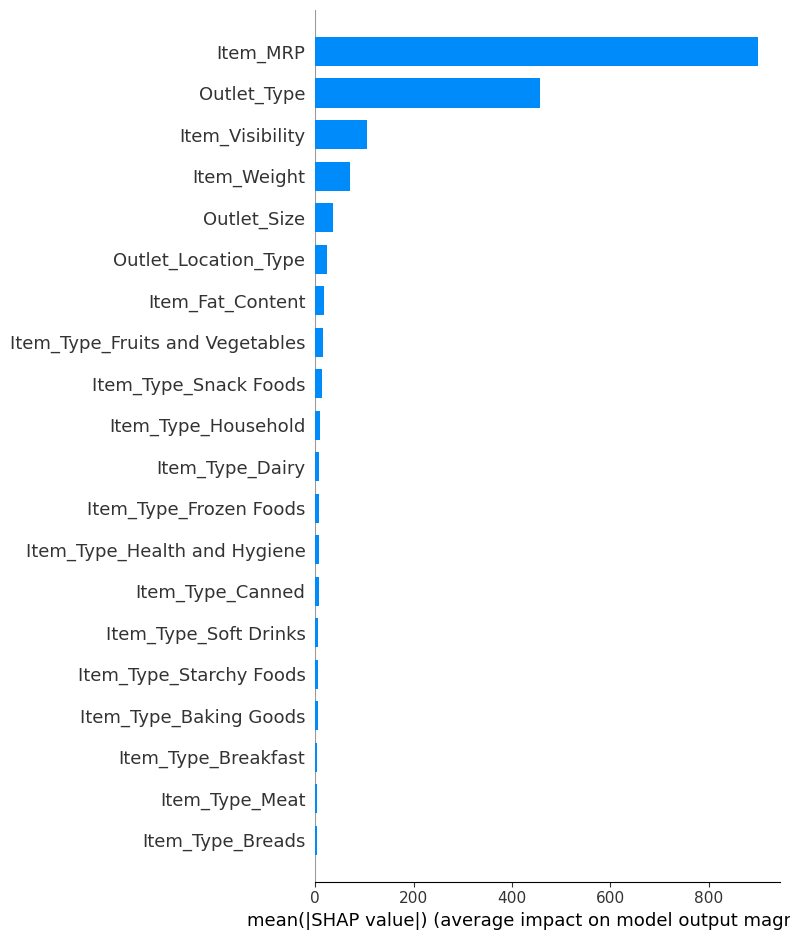

In [8]:
# Plotting a summary bar plot
shap.summary_plot(shap_values, features= X_train_df, plot_type='bar')

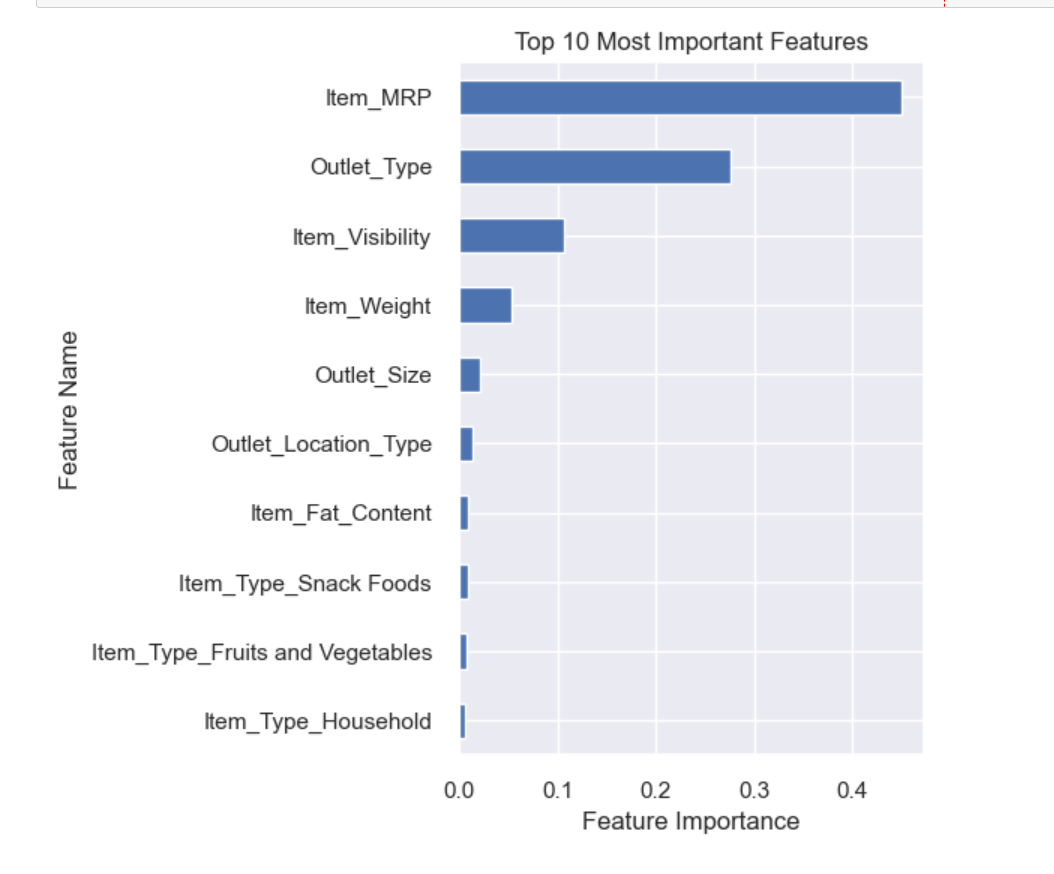

Both barplots above have the same top 5 chosen importances.

### Summary Dot Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


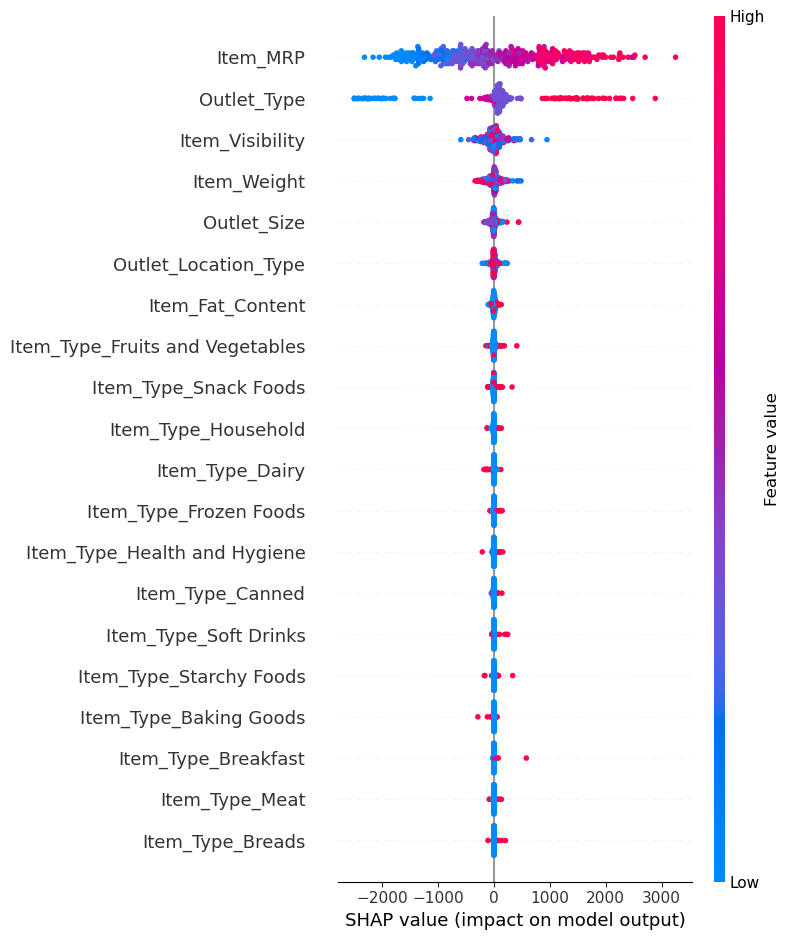

In [9]:
# Plotting a summary dot plot
shap.summary_plot(shap_values, X_shap)

Top 3 Most Important Features:

- Outlet_Type: Can be grocery store or supermarket. The location positively influences the sales price of items.

- Outlet_Size: The size of the outlet positively influences the sales price.

- Item_Type_Seafood: The product category of Seafood also positively influences the sales price.

## Local Explanations

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

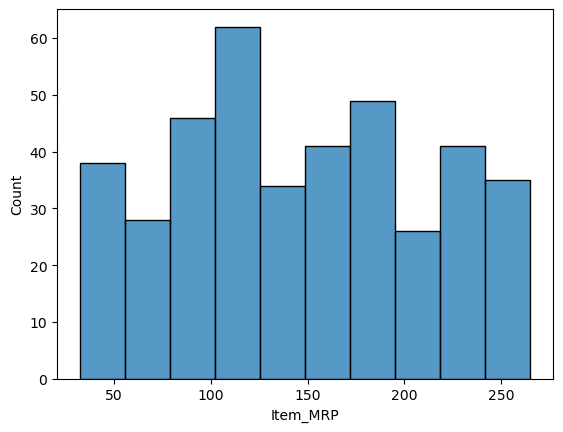

In [11]:
# Item_MRP
sns.histplot(X_shap['Item_MRP']);

In [12]:
# Saving filters where Item_MRP is over 100
filt_mrp = X_shap['Item_MRP'] > 100
filt_mrp.value_counts()

True     294
False    106
Name: Item_MRP, dtype: int64

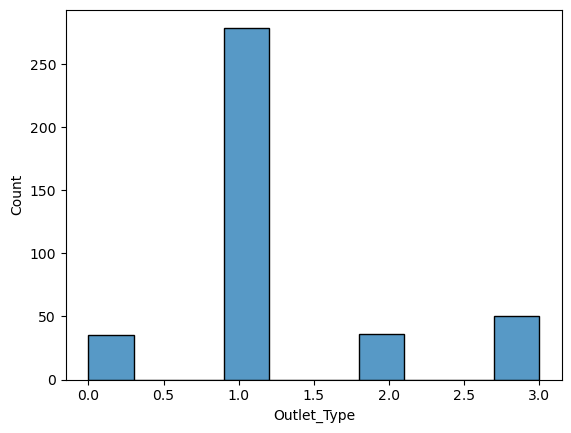

In [13]:
# Outlet_Type
sns.histplot(X_shap['Outlet_Type']);

In [14]:
# Saving Outlet_Type filter
filt_ot = X_shap['Outlet_Type'] <= 2
filt_ot.value_counts()

True     350
False     50
Name: Outlet_Type, dtype: int64

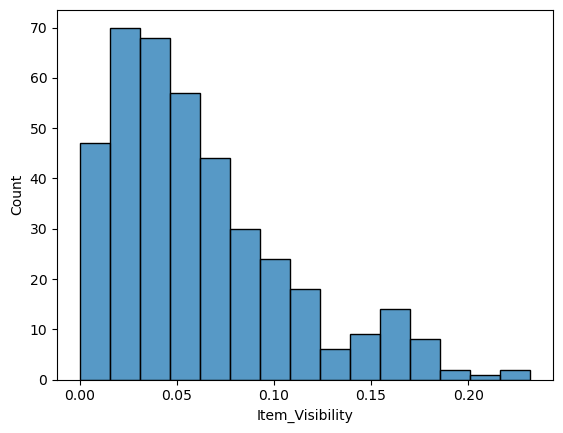

In [15]:
# Item_Visibility
sns.histplot(X_shap['Item_Visibility']);

In [16]:
# Saving Item_Visibility filter
filt_visibility = X_shap['Item_Visibility'] < 0.15
filt_visibility.value_counts()

True     370
False     30
Name: Item_Visibility, dtype: int64

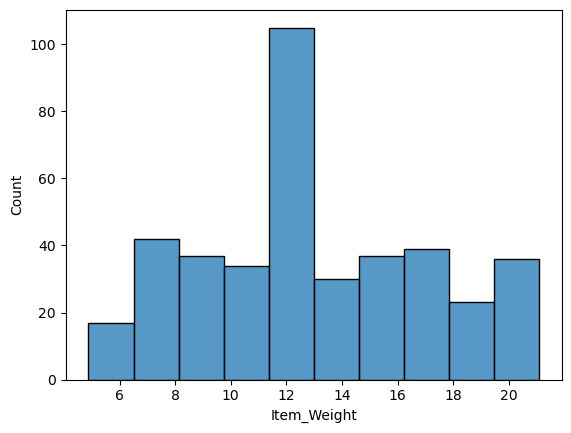

In [17]:
# Item_Weight
sns.histplot(X_shap['Item_Weight']);

In [18]:
# Saving Item_Weight filter
filt_weight = X_shap['Item_Weight'] < 16
filt_weight.value_counts()

True     290
False    110
Name: Item_Weight, dtype: int64

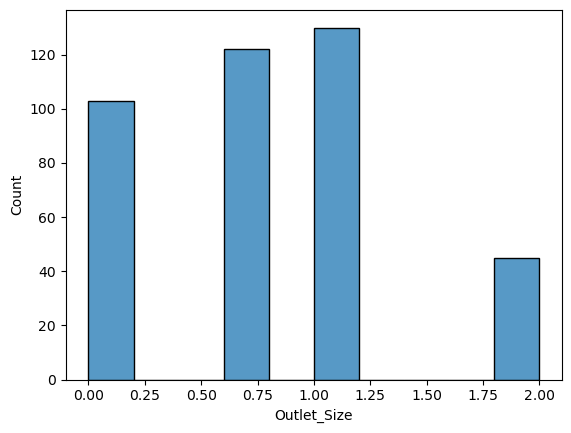

In [19]:
# Outlet_Size
sns.histplot(X_shap['Outlet_Size']);

In [20]:
# Saving Outlet_Size filter
filt_os = X_shap['Outlet_Size'] < 1
filt_os.value_counts()

True     225
False    175
Name: Outlet_Size, dtype: int64

## Group 1:

- High Item_MRP
- Smaller Outlet_Type
- Low Item_Visibility
- Low Item Weight
- Smaller Outlet_Size

In [21]:
# Filtering for group 1 
X_shap[filt_mrp & filt_ot & filt_visibility & filt_weight & filt_os]

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
2497    15.100000               1.0         0.087407  221.8456     0.000000   
8117    10.800000               0.0         0.049820  243.2144     0.760044   
7475    15.000000               0.0         0.044999  140.4838     0.760044   
290      7.270000               0.0         0.071222  113.5518     0.760044   
662     11.100000               0.0         0.111298  191.7846     0.760044   
...           ...               ...              ...       ...          ...   
7301     6.035000               1.0         0.065771  185.3240     0.000000   
7748    12.904458               1.0         0.082341  185.7608     0.000000   
6561    12.600000               1.0         0.031713  172.5764     0.760044   
3865    10.695000               1.0         0.101542  173.7712     0.760044   
292     12.850000               0.0         0.033288  198.4768     0.760044   

      Outlet_Location_Type  Outlet_Type  Item_Type_Baking Goods  \
2497                   0.0          1.0                     0.0   
8117                   1.0          1.0                     0.0   
7475                   1.0          1.0                     0.0   
290                    1.0          1.0                     0.0   
662                    1.0          1.0                     0.0   
...                    ...          ...                     ...   
7301                   1.0          1.0                     1.0   
7748                   0.0          0.0                     0.0   
6561                   1.0          1.0                     1.0   
3865                   2.0          0.0                     0.0   
292                    1.0          1.0                     0.0   

      Item_Type_Breads  Item_Type_Breakfast  ...  \
2497               0.0                  0.0  ...   
8117               0.0                  0.0  ...   
7475               0.0                  0.0  ...   
290                0.0                  0.0  ...   
662                0.0                  0.0  ...   
...                ...                  ...  ...   
7301               0.0                  0.0  ...   
7748               0.0                  0.0  ...   
6561               0.0                  0.0  ...   
3865               0.0                  1.0  ...   
292                0.0                  0.0  ...   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
2497                              1.0                    0.0   
8117                              1.0                    0.0   
7475                              0.0                    0.0   
290                               0.0                    0.0   
662                               1.0                    0.0   
...                               ...                    ...   
7301                              0.0                    0.0   
7748                              0.0                    0.0   
6561                              0.0                    0.0   
3865                              0.0                    0.0   
292                               1.0                    0.0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
2497                           0.0                  0.0             0.0   
8117                           0.0                  0.0             0.0   
7475                           1.0                  0.0             0.0   
290                            0.0                  0.0             0.0   
662                            0.0                  0.0             0.0   
...                            ...                  ...             ...   
7301                           0.0                  0.0             0.0   
7748                           0.0                  0.0             1.0   
6561                           0.0                  0.0             0.0   
3865                           0.0                  0.0             0.0   
292                            0.

In [22]:
idx_example_1 = 290
X_shap.loc[idx_example_1]

Item_Weight                          7.270000
Item_Fat_Content                     0.000000
Item_Visibility                      0.071222
Item_MRP                           113.551800
Outlet_Size                          0.760044
Outlet_Location_Type                 1.000000
Outlet_Type                          1.000000
Item_Type_Baking Goods               0.000000
Item_Type_Breads                     0.000000
Item_Type_Breakfast                  0.000000
Item_Type_Canned                     0.000000
Item_Type_Dairy                      0.000000
Item_Type_Frozen Foods               0.000000
Item_Type_Fruits and Vegetables      0.000000
Item_Type_Hard Drinks                0.000000
Item_Type_Health and Hygiene         0.000000
Item_Type_Household                  0.000000
Item_Type_Meat                       0.000000
Item_Type_Others                     0.000000
Item_Type_Seafood                    0.000000
Item_Type_Snack Foods                0.000000
Item_Type_Soft Drinks             

## Group 2:

- Lower Item_MRP
- Smaller Outlet_Type
- Low Item_Visibility
- Low Item Weight
- Smaller Outlet_Size

In [23]:
# Filtering for group 2
X_shap[~filt_mrp & filt_ot & filt_visibility & filt_weight & filt_os]

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
3888    15.850000               1.0         0.110653   36.9506     0.760044   
7903     6.440000               0.0         0.000000   99.8700     0.760044   
5429    14.000000               1.0         0.041950   54.0640     0.000000   
2850     7.360000               0.0         0.052608   56.3588     0.760044   
6224    13.150000               0.0         0.020758   84.3566     0.760044   
7094     9.395000               1.0         0.109713   41.3112     0.760044   
3987    11.100000               0.0         0.010663   82.3908     0.760044   
1050     9.195000               1.0         0.064376   83.1566     0.760044   
8118    15.700000               0.0         0.030877   42.1770     0.760044   
8111    10.100000               0.0         0.046848   60.6878     0.760044   
7444     7.935000               0.0         0.017253   51.4350     0.760044   
5700     8.350000               1.0         0.126870   74.4354     0.000000   
8476    12.500000               0.0         0.018887   98.8384     0.760044   
205     15.500000               1.0         0.042465   81.5934     0.760044   
4732     9.300000               0.0         0.111221   65.7826     0.000000   
1537     4.880000               1.0         0.000000   53.1298     0.000000   
7840    10.695000               0.0         0.057792   61.4536     0.000000   
1664     7.270000               0.0         0.046823   99.3384     0.760044   
7706    11.800000               1.0         0.077154   35.7558     0.760044   
4979     8.300000               1.0         0.038212   87.7198     0.000000   
3373     9.105000               0.0         0.038700   33.7900     0.760044   
2341    13.650000               0.0         0.077671   55.0930     0.760044   
6701     7.760000               0.0         0.059473   98.7700     0.760044   
1912    10.395000               1.0         0.091688   49.0008     0.760044   
1204    12.904458               0.0         0.043169   82.8592     0.000000   
15       9.000000               1.0         0.069089   56.3614     0.000000   
195     10.500000               0.0         0.041395   37.6164     0.000000   
1522     6.590000               0.0         0.105597   83.4908     0.000000   
5081     6.750000               1.0         0.108219   96.3752     0.000000   
7777    15.850000               1.0         0.102262   47.1744     0.760044   
6527     5.980000               0.0         0.075711   55.6614     0.760044   
5241     8.300000               0.0         0.035348   38.0506     0.000000   
3637     6.800000               0.0         0.037573   50.2034     0.760044   
959     12.350000               0.0         0.026676   57.0246     0.000000   
6802    13.650000               1.0         0.012824   55.5588     0.760044   
7400    11.650000               1.0         0.076278   85.1908     0.760044   
5489     8.890000               0.0         0.005486   99.3016     0.760044   
3150    13.350000               0.0         0.017821   75.1012     0.760044   
4487    13.650000               1.0         0.000000   36.6532     0.760044   
1070    13.500000               0.0         0.055102   37.0874     0.760044   
312      6.670000               1.0         0.123429   89.1514     0.000000   

      Outlet_Location_Type  Outlet_Type  Item_Type_Baking Goods  \
3888                   1.0          1.0                     0.0   
7903                   1.0          1.0                     0.0   
5429                   1.0          1.0                     0.0   
2850                   1.0          1.0                     0.0   
6224                   1.0          1.0                     0.0   
7094                   1.0          1.0                     0.0   
3987                   1.0          1.0                     0.0   
1050                   1.0          1.0                     0.0   
8118                   1.0          1.0                     0.0   
8111             

In [24]:
idx_example_2 = 365
X_shap.iloc[idx_example_2]

Item_Weight                         20.250000
Item_Fat_Content                     1.000000
Item_Visibility                      0.022639
Item_MRP                           248.409200
Outlet_Size                          0.760044
Outlet_Location_Type                 1.000000
Outlet_Type                          1.000000
Item_Type_Baking Goods               0.000000
Item_Type_Breads                     0.000000
Item_Type_Breakfast                  0.000000
Item_Type_Canned                     0.000000
Item_Type_Dairy                      1.000000
Item_Type_Frozen Foods               0.000000
Item_Type_Fruits and Vegetables      0.000000
Item_Type_Hard Drinks                0.000000
Item_Type_Health and Hygiene         0.000000
Item_Type_Household                  0.000000
Item_Type_Meat                       0.000000
Item_Type_Others                     0.000000
Item_Type_Seafood                    0.000000
Item_Type_Snack Foods                0.000000
Item_Type_Soft Drinks             

## Visualizing Individual SHAP for Selected Examples

In [25]:
import pandas as pd
y_pred = pd.Series(loaded_rf.predict(X_shap), index=X_shap.index)

### Group 1

In [26]:
# Forceplot for group 1
shap.force_plot(explainer.expected_value,
                shap_values=shap_values[idx_example_1].values,
               features=X_shap.loc[idx_example_1])

In [27]:
# Saving forceplot for group 1 
shap.force_plot(explainer.expected_value,
                shap_values=shap_values[idx_example_1].values,
               features=X_shap.loc[idx_example_1],
               show=False,
               matplotlib=True).savefig('Group1ForcePlot.png')

As we can see in the force plot for group 1:

- Item_MRP is a strong factor pushing towards a higher sales prediction.

- Decreasing factors are: Item_Visibility, Item_Weight and Outlet_Size





In [28]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(
    training_data=X_shap.values,  
    feature_names=X_shap.columns, 
   mode='regression'
)
lime_explainer

In [29]:
# Lime plot for group 1
exp = lime_explainer.explain_instance(X_shap.iloc[idx_example_1], loaded_rf.predict)
exp.show_in_notebook()
# Saving lime plot for group 1
exp.save_to_file('Group1LIMEPlot.html')

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


It is evident from the LIME explanation above for Group 1, there are many factors pushing for a higher sales prediction:

- Item_MRP
- Item_Type_Hard Drinks


### Group 2

In [30]:
# Forceplot for group 2
shap.force_plot(explainer.expected_value,
                shap_values=shap_values[idx_example_2].values,
               features=X_shap.loc[idx_example_2])

In [31]:
# Saving forceplot for group 2
shap.force_plot(explainer.expected_value,
                shap_values=shap_values[idx_example_2].values,
               features=X_shap.loc[idx_example_2],
               show=False,
               matplotlib=True).savefig('Group2ForcePlot.png')

Observations from the force plot for group 2:

As we compare to Group 1, Item_MRP is still a large influence on pushing the sales prediction higher, it is evident that there is slightly more influence now from Item_Visibility and Outlet_Type pushing towards the higher sales prediction When Item_MRP is lower.

Decreasing factors for Group 2 are as follows:
- Item_Weight
- Item_Type_Dairy
- Outlet_Size



In [32]:
# Lime plot fpr group 2
exp = lime_explainer.explain_instance(X_shap.iloc[idx_example_2], loaded_rf.predict)
exp.show_in_notebook()
# Saving group 2 LIME plot
exp.save_to_file('Group2LIMEPlot.html')

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Based on the LIME explanation above for Group 2, there are factors pushing for a higher sales prediction.

Contributing factors are:

- Item_MRP
- Item_Visibility

Item_MRP is still a major factor in the sales prediction, but with Group 2 representing lower MRP, we can see more influence from the actual Item Type and Item Visibility.



### Important Pointers From Both Groups

- Max Retail Price has on the resulting higher sales prediction, higher the price per unit, the higher the sales.

- Group 1 with the higher Max Retail Price has more value in the filling items such as Item Weight and Dairy Items.